

*   Make sure to Save a Copy in Drive, then put your answers in the copied file
*   Download the csv file from the Drive then upload it on the Files icon located at the left side of this Colab file ^^
*   You can base on the Colab file uploaded in the Drive for your answers ^^



**Import Libraries**

In [27]:
# Import numpy, pandas, matplotlib, sklearn, and seaborn libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import seaborn as sns



**Load Dataset**

In [4]:
# Create a variable named loan and use pd.read_csv to load it
loan = pd.read_csv("loan.csv")


# Show the data
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Exploratory Data Analysis**

In [5]:
# Use the .shape attribute to view the dimensions of the DataFrame
loan.shape


(614, 13)

In [6]:
# Use the .head() method to view the first few rows of the DataFrame
loan.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# Use .info() method to see the number of columns, column labels, column data types, memory usage,
#range index, and the number of cells in each column
loan.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# Use .nunique() method to view the number of unique values for each column
loan.nunique()


,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [11]:
# Use .describe() method to view the count, mean, std, min, 25%, 75%, and max values of each column in the DataFrame
loan.describe()

,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,creditHistory
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
# Create a variable named loan and use the .rename() method to change the column names to lowercase
loan = loan.rename(columns={
    'Loan_ID' : 'loanId',
    'Gender' : 'gender',
    'Married' : 'married',
    'Dependents' : 'dependents',
    'Education' : 'education',
    'Self_Employed' : 'selfEmployed',
    'ApplicantIncome' : 'applicantIncome',
    'CoapplicantIncome' : 'coapplicantIncome',
    'LoanAmount' : 'loanAmount',
    'Loan_Amount_Term' : 'loanAmountTerm',
    'Credit_History' : 'creditHistory',
    'Property_Area' : 'propertyArea' ,
    'Loan_Status' : 'loanStatus'
})

# Use the .head() method to view the changed column names
loan.head()

,loanId,gender,married,dependents,education,selfEmployed,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,creditHistory,propertyArea,loanStatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
# Use .dtypes property to view the data type of each column
loan.dtypes


,0
loanId,object
gender,object
married,object
dependents,object
education,object
selfEmployed,object
applicantIncome,int64
coapplicantIncome,float64
loanAmount,float64
loanAmountTerm,float64


In [14]:
# Create a variable named numericalFeatures and store the features that have numerical - (any?)
numericalFeatures = ["applicantIncome","coapplicantIncome","loanAmount","loanAmountTerm", "creditHistory"]



# Subset the numericalFeatures in the loan Dataframe and use the .mean() method to view the mean of all numerical features
loan[numericalFeatures].mean()

,0
applicantIncome,5403.459283
coapplicantIncome,1621.245798
loanAmount,146.412162
loanAmountTerm,342.000000
creditHistory,0.842199


In [15]:
# Subset the numericalFeatures in the loan Dataframe and use the .median() method to view the median of all numerical
loan[numericalFeatures].median()


,0
applicantIncome,3812.5
coapplicantIncome,1188.5
loanAmount,128.0
loanAmountTerm,360.0
creditHistory,1.0


In [16]:
# Subset the numericalFeatures in the loan Dataframe and use the .mode() method to view the mode of all numerical features
loan[numericalFeatures].mode()


,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,creditHistory
0,2500,0.0,120.0,360.0,1.0


In [17]:
#Subset the numericalFeatures in the loan Dataframe and use the .std() method to view the standard deviation of all numerical features
loan[numericalFeatures].std()


,0
applicantIncome,6109.041673
coapplicantIncome,2926.248369
loanAmount,85.587325
loanAmountTerm,65.120410
creditHistory,0.364878


In [18]:
# Subset the numericalFeatures in the loan Dataframe and use the .var() method to view the variance of all numerical
loan[numericalFeatures].var()


,0
applicantIncome,3.732039e+07
coapplicantIncome,8.562930e+06
loanAmount,7.325190e+03
loanAmountTerm,4.240668e+03
creditHistory,1.331362e-01


In [20]:
# Create a variable named corrs and subset the numericalFeatures in the loan Dataframe (not sure if ganyan ba, but it works naman hehe)
corrs = loan[numericalFeatures]
# use the .corr() method to view the correlation of all numerical features
corrs.corr()


,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,creditHistory
applicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
coapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
loanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
loanAmountTerm,-0.045306,-0.059878,0.039447,1.000000,0.001470
creditHistory,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [21]:
# Use .duplicated().sum() to check for the total duplicated rows
loan.duplicated().sum()


0

In [22]:
# Use .isna().sum() to chech for None, nulls, or Nan values
loan.isna().sum()


,0
loanId,0
gender,13
married,3
dependents,15
education,0
selfEmployed,32
applicantIncome,0
coapplicantIncome,0
loanAmount,22
loanAmountTerm,14


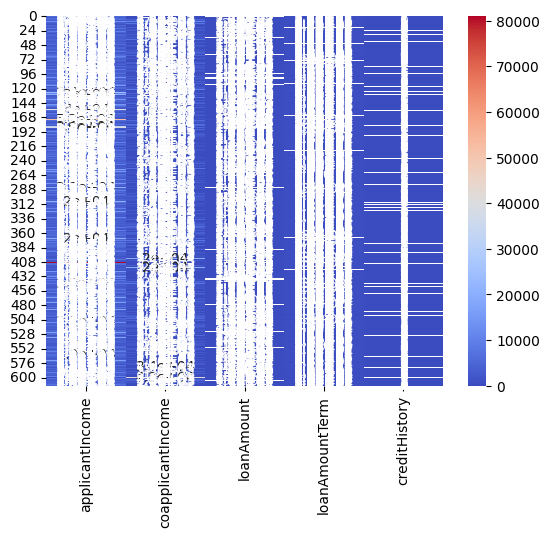

In [28]:
# Use sns.heatmap() to visualize the correlation between the numerical features
sns.heatmap(corrs, annot=True, cmap='coolwarm')

# Use plt.show() to view the plot
plt.show()

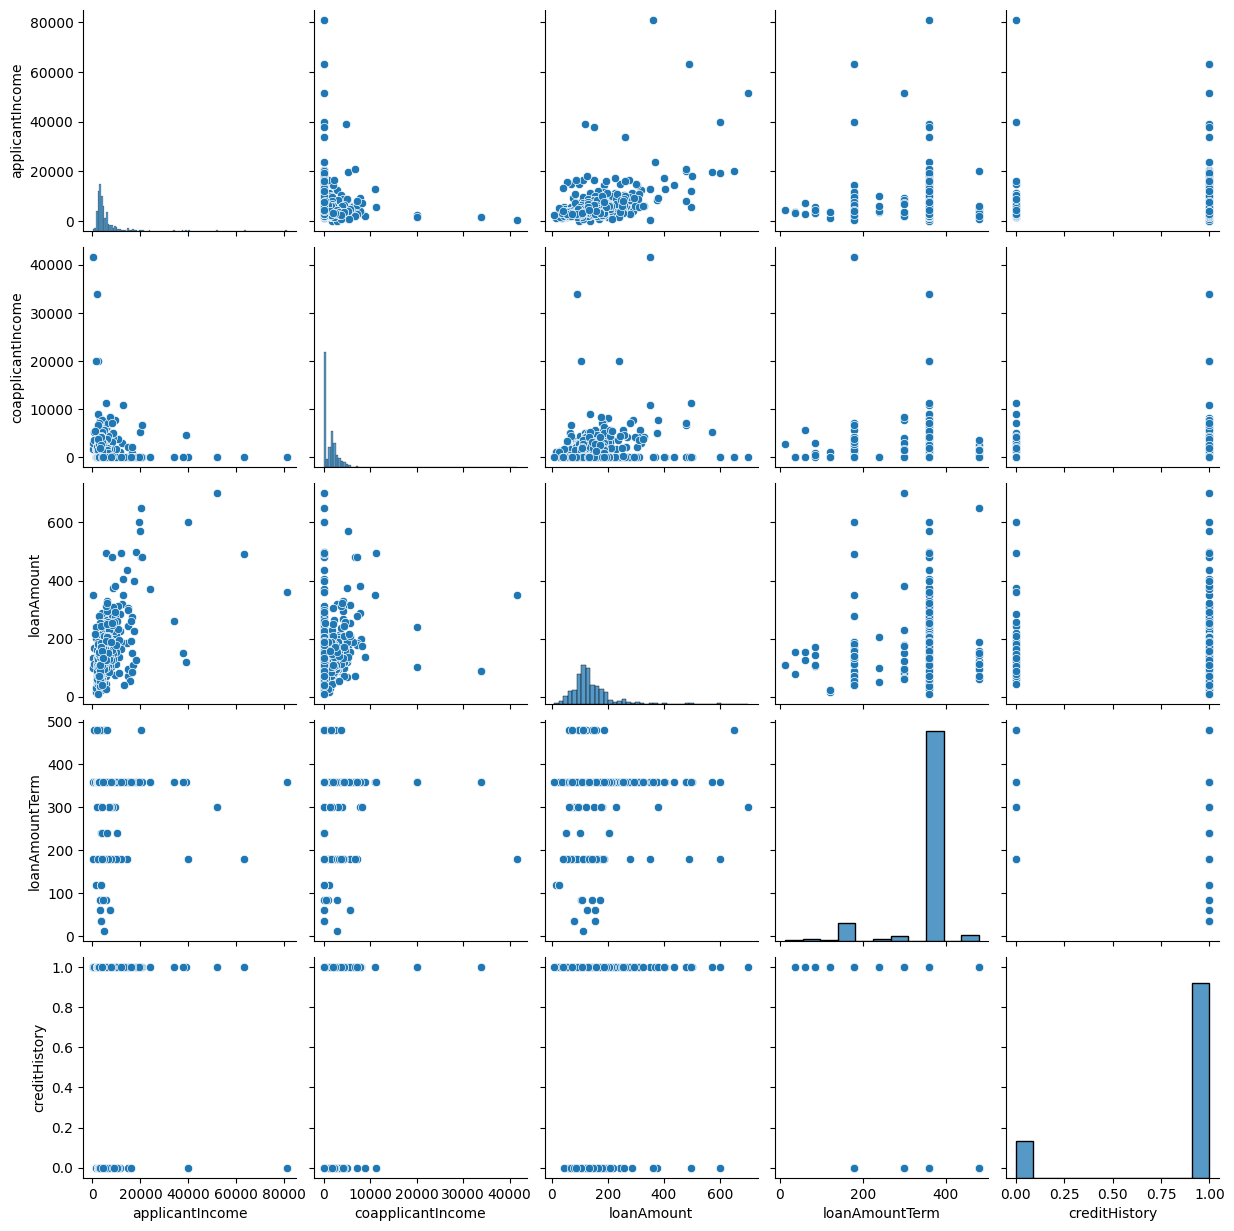

In [29]:
# Use sns.pairplot() to create a pairplot of the load DataFrame
sns.pairplot(loan)

# Use plt.show() to view the plot
plt.show()

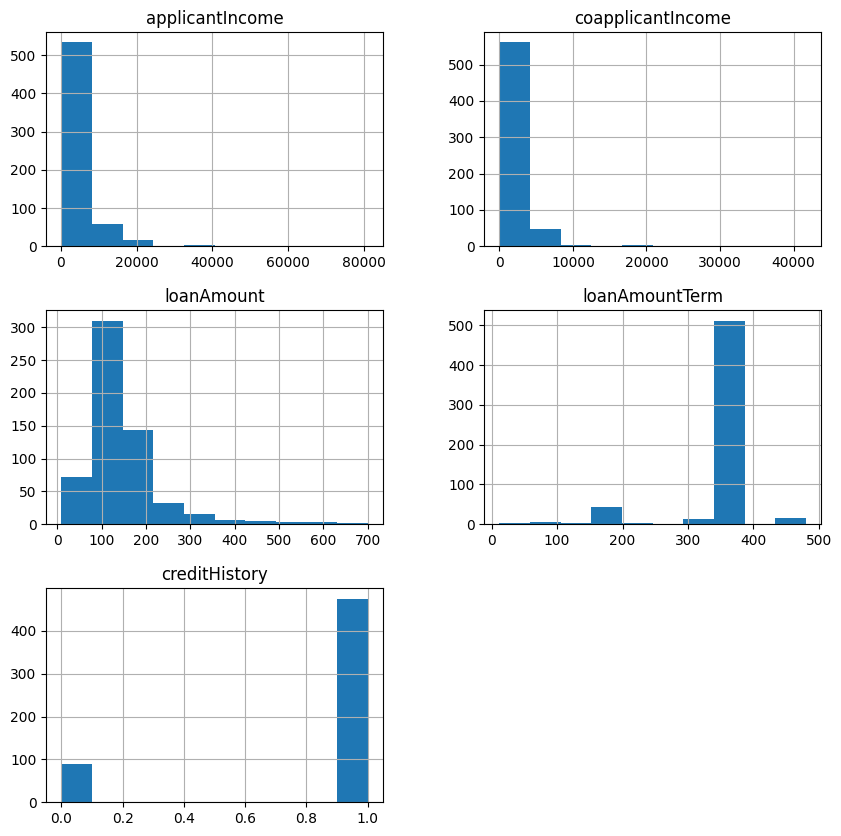

In [30]:
# Use .hist() to create a histogram of the load DataFrame and set bins = 10 and figsize to (10,10)
loan.hist(bins=10, figsize=(10,10))

# Use plt.show() to view the plot
plt.show()

**Data Cleaning**

In [32]:
# Create a variable named dropped and use the .dropna() method to drop None, nulls, or Nan values
dropped = loan.dropna()

# Use .isna().sum() to check for None, nulls, or Nan values
# loan.isna().sum()
dropped.isna().sum()

,0
loanId,0
gender,0
married,0
dependents,0
education,0
selfEmployed,0
applicantIncome,0
coapplicantIncome,0
loanAmount,0
loanAmountTerm,0


**Fill with mean, median, mode**

In [33]:
# Create variable named numericalDf and subset the numericalFeatures from the loan DataFrame
numericalDf = loan[numericalFeatures]

# Use .head() method to view the first few rows
numericalDf.head()

,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,creditHistory
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [36]:
# Replace 0 values with NaN to change it later easily with the mean, median, or mode
# https://www.statology.org/pandas-replace-0-with-nan/
numericalDf.replace(0, np.nan, inplace = True)

# Use the .head() to view the updated DataFrame
numericalDf.head()


<ipython-input-36-dcb237266ce6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericalDf.replace(0, np.nan, inplace = True)


,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,creditHistory
0,5849,NaN,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,NaN,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,NaN,141.0,360.0,1.0


In [37]:
# Create a variable named filledMean then use .fillna(numericalDf.mean()) to fill the NaN values with the mean
filledMean = numericalDf.fillna(numericalDf.mean())

# Use .head() method to view the filledMean DataFrame
filledMean.head()

,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,creditHistory
0,5849,2919.193314,146.412162,360.0,1.0
1,4583,1508.000000,128.000000,360.0,1.0
2,3000,2919.193314,66.000000,360.0,1.0
3,2583,2358.000000,120.000000,360.0,1.0
4,6000,2919.193314,141.000000,360.0,1.0


In [38]:
# Create a variable named filledMedian then use .fillna(numericalDf.median()) to fill the NaN values with the median
filledMedian = numericalDf.fillna(numericalDf.median())

# Use .head() method to view the filledMedian DataFrame
filledMedian.head()

,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,creditHistory
0,5849,2166.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,2166.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,2166.0,141.0,360.0,1.0


In [39]:
# Create a variable named filledMode then use .fillna(numericalDf.mode().iloc[0]) to fill all the NaN values with the mode
filledMode= numericalDf.fillna(numericalDf.mode().iloc[0])

# Use .head() method to view the filledMedian DataFrame
filledMode.head()

,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,creditHistory
0,5849,1666.0,120.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,1666.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,1666.0,141.0,360.0,1.0


**Fill with most common (for categorical data)**

In [46]:
# Create a variable named categoricalFeatures and store all features with categorical values
categoricalFeatures = ['loanId', 'gender', 'married', 'dependents', 'education', 'selfEmployed', 'propertyArea', 'loanStatus']

# Create a variable named categoricalDf then subset the categoricalFeatures on the loan Dataframe
categoricalDf = loan[categoricalFeatures]

# Use .isna().sum() method to view how many are NaN values
# loan.dtypes
categoricalDf.head()

,loanId,gender,married,dependents,education,selfEmployed,propertyArea,loanStatus
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [48]:
# Create a variable named filledCategoricalMode then store categoricalDf.copy()
filledCategoricalMode = categoricalDf.copy()

# Use .head() method to view the filledCategoricalMode DataFrame
filledCategoricalMode.head()

# Use a for loop  that iterates through each column (col) within the filledCategoricalMode DataFrame.f
for col in filledCategoricalMode.columns:
  mode = filledCategoricalMode[col].mode()[0]
  filledCategoricalMode[col] = filledCategoricalMode[col].fillna(mode)


# Use .isna().sum() method to view if the NaN values have been filled
filledCategoricalMode.isna().sum()


,0
loanId,0
gender,0
married,0
dependents,0
education,0
selfEmployed,0
propertyArea,0
loanStatus,0


**Save df**

In [50]:
# Subset the numericalFeatures and categoricalFeatures in the loan DataFrame then store it in the filledMean and filledCategoricalMode variables
numericalFeatures = ["applicantIncome","coapplicantIncome","loanAmount","loanAmountTerm", "creditHistory"]
categoricalFeatures = ['loanId', 'gender', 'married', 'dependents', 'education', 'selfEmployed', 'propertyArea', 'loanStatus']

loan[numericalFeatures] = filledMean
loan[categoricalFeatures] = filledCategoricalMode

# Use the .head()
loan.head()

,loanId,gender,married,dependents,education,selfEmployed,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,creditHistory,propertyArea,loanStatus
0,LP001002,Male,No,0,Graduate,No,5849,2919.193314,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,2919.193314,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,2919.193314,141.000000,360.0,1.0,Urban,Y


In [51]:
# Use the .isna().sum() to check whether there are still NaN values
loan.isna().sum()


,0
loanId,0
gender,0
married,0
dependents,0
education,0
selfEmployed,0
applicantIncome,0
coapplicantIncome,0
loanAmount,0
loanAmountTerm,0


**Label Encoding**

In [53]:
labelEncoded = loan.copy()

# Create a variable named categoricalColumns and then store all columns with categorical data
categoricalColumns = ['loanId', 'gender', 'married', 'dependents', 'education', 'selfEmployed', 'propertyArea', 'loanStatus']

labelEncoders = {}
for col in categoricalColumns:
  labelEncoders[col] = sklearn.preprocessing.LabelEncoder()
  labelEncoded[col] = labelEncoders[col].fit_transform(loan[col])

# Use .head() method to view the first 10 rows of the labelEncoded DataFrame
labelEncoded.head(10)


,loanId,gender,married,dependents,education,selfEmployed,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,creditHistory,propertyArea,loanStatus
0,0,1,0,0,0,0,5849,2919.193314,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.000000,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,2919.193314,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.000000,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,2919.193314,141.000000,360.0,1.0,2,1
5,5,1,1,2,0,1,5417,4196.000000,267.000000,360.0,1.0,2,1
6,6,1,1,0,1,0,2333,1516.000000,95.000000,360.0,1.0,2,1
7,7,1,1,3,0,0,3036,2504.000000,158.000000,360.0,1.0,1,0
8,8,1,1,2,0,0,4006,1526.000000,168.000000,360.0,1.0,2,1
9,9,1,1,1,0,0,12841,10968.000000,349.000000,360.0,1.0,1,0


**One-hot Encoding**

In [54]:
# Create a value named categoricalEncoded then store pd.get_dummies(loan, columns=categoricalColumns) to it
categoricalEncoded = pd.get_dummies(loan, columns=categoricalColumns)

# Type categoricalEncoded to view the whole categoricalEncoded DataFrame
categoricalEncoded

,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,creditHistory,loanId_LP001002,loanId_LP001003,loanId_LP001005,loanId_LP001006,loanId_LP001008,...,dependents_3+,education_Graduate,education_Not Graduate,selfEmployed_No,selfEmployed_Yes,propertyArea_Rural,propertyArea_Semiurban,propertyArea_Urban,loanStatus_N,loanStatus_Y
0,5849,2919.193314,146.412162,360.0,1.0,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,True
1,4583,1508.000000,128.000000,360.0,1.0,False,True,False,False,False,...,False,True,False,True,False,True,False,False,True,False
2,3000,2919.193314,66.000000,360.0,1.0,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,True
3,2583,2358.000000,120.000000,360.0,1.0,False,False,False,True,False,...,False,False,True,True,False,False,False,True,False,True
4,6000,2919.193314,141.000000,360.0,1.0,False,False,False,False,True,...,False,True,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,2919.193314,71.000000,360.0,1.0,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,True
610,4106,2919.193314,40.000000,180.0,1.0,False,False,False,False,False,...,True,True,False,True,False,True,False,False,False,True
611,8072,240.000000,253.000000,360.0,1.0,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,True
612,7583,2919.193314,187.000000,360.0,1.0,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,True


**Count Encoding**

In [56]:
countEncoded = loan.copy()

# Create a for loop
for col in categoricalColumns:
  countEncoded[col] = loan[col].map(loan[col].value_counts())

# Use .head on the countEncoded variable to view the first 10 rows of the DataFrame
countEncoded.head(10)

# done nyahahha 6:07pm 11/29

,loanId,gender,married,dependents,education,selfEmployed,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,creditHistory,propertyArea,loanStatus
0,1,502,213,360,480,532,5849,2919.193314,146.412162,360.0,1.0,202,422
1,1,502,401,102,480,532,4583,1508.000000,128.000000,360.0,1.0,179,192
2,1,502,401,360,480,82,3000,2919.193314,66.000000,360.0,1.0,202,422
3,1,502,401,360,134,532,2583,2358.000000,120.000000,360.0,1.0,202,422
4,1,502,213,360,480,532,6000,2919.193314,141.000000,360.0,1.0,202,422
5,1,502,401,101,480,82,5417,4196.000000,267.000000,360.0,1.0,202,422
6,1,502,401,360,134,532,2333,1516.000000,95.000000,360.0,1.0,202,422
7,1,502,401,51,480,532,3036,2504.000000,158.000000,360.0,1.0,233,192
8,1,502,401,101,480,532,4006,1526.000000,168.000000,360.0,1.0,202,422
9,1,502,401,102,480,532,12841,10968.000000,349.000000,360.0,1.0,233,192
